# Facial Keypoints Detection _Kaggle_ Competition
## Deep Learning
## Project : The objective of this task is to predict keypoint positions on face images.

Detecing facial keypoints is a very challenging problem.  Facial features vary greatly from one individual to another, and even for a single individual, there is a large amount of variation due to 3D pose, size, position, viewing angle, and illumination conditions. Computer vision research has come a long way in addressing these difficulties, but there remain many opportunities for improvement. The objective of this task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:

- tracking faces in images and video
- analysing facial expressions
- detecting dysmorphic facial signs for medical diagnosis
- biometrics / face recognition

For more information visit [Kaggle competition website](https://www.kaggle.com/c/facial-keypoints-detection/overview).

### Step 1: Load & Explore Dataset

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

DATA_PATH = "./data"
TRAIN_DATA_PATH = os.path.join(DATA_PATH, "training.csv")
TEST_DATA_PATH = os.path.join(DATA_PATH, "test.csv")

In [2]:
df = pd.read_csv(TRAIN_DATA_PATH)
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

__Filling missing values with their means__

In [4]:
means = df.mean(axis=0, skipna=True, numeric_only=True)

In [5]:
df.fillna(value=means, axis=0, inplace=True)

In [6]:
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,...,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.445786,3.150688,3.080385,3.030822,1.526825,1.309453,1.931180,1.633828,1.332939,1.311183,...,4.280038,5.720567,2.313924,2.597932,2.249461,2.506639,1.887559,2.966475,4.259953,5.395169
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.084235,35.906648,28.788000,36.329459,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,46.602370,59.292697,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,46.584000,75.567671
50%,66.492983,37.531396,30.260706,37.818074,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.424713,63.451421,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.570252,78.728774
75%,68.024349,39.254400,31.767416,39.562527,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,50.330437,66.492686,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,50.662249,82.222604
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7049 non-null float64
left_eye_center_y            7049 non-null float64
right_eye_center_x           7049 non-null float64
right_eye_center_y           7049 non-null float64
left_eye_inner_corner_x      7049 non-null float64
left_eye_inner_corner_y      7049 non-null float64
left_eye_outer_corner_x      7049 non-null float64
left_eye_outer_corner_y      7049 non-null float64
right_eye_inner_corner_x     7049 non-null float64
right_eye_inner_corner_y     7049 non-null float64
right_eye_outer_corner_x     7049 non-null float64
right_eye_outer_corner_y     7049 non-null float64
left_eyebrow_inner_end_x     7049 non-null float64
left_eyebrow_inner_end_y     7049 non-null float64
left_eyebrow_outer_end_x     7049 non-null float64
left_eyebrow_outer_end_y     7049 non-null float64
right_eyebrow_inner_end_x    7049 non-null float64
right_eyebrow_inner_end_y 

### Step 2: Prepare data to learning process.

In [8]:
# Extract images from DataFrame
images = df.Image
df.drop(labels='Image', inplace=True, axis=1)

# Convert str of pixels into numpy array
images = [list(map(int, img.split())) for img in images]
images = np.array(images)

images = images.reshape((df.shape[0], 96, 96))

In [9]:
output_indices = df.keys().values
output_indices = pd.Series(np.arange(output_indices.shape[0]), output_indices)

In [10]:
targets = df.to_numpy()

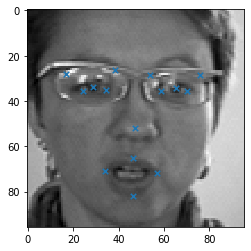

In [11]:
index = 10
plt.imshow(images[index], cmap='gray')
plt.scatter(targets[index, 0::2], targets[index, 1::2], marker='x', s=30, edgecolors='r')

In [12]:
# Normalize input images
images = images.astype(np.float32) / 255
images = images.reshape(images.shape + (1,))

In [13]:
from sklearn.model_selection import train_test_split

train_img, val_img, train_targets, val_targets = train_test_split(images, targets, test_size=0.2, random_state=42)

### Step 4: Create CNN model to perform regression.

In [14]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=(96, 96, 1), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, kernel_size=(3, 3), padding="same", input_shape=(96, 96, 1), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation='relu'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(output_indices.shape[0])
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

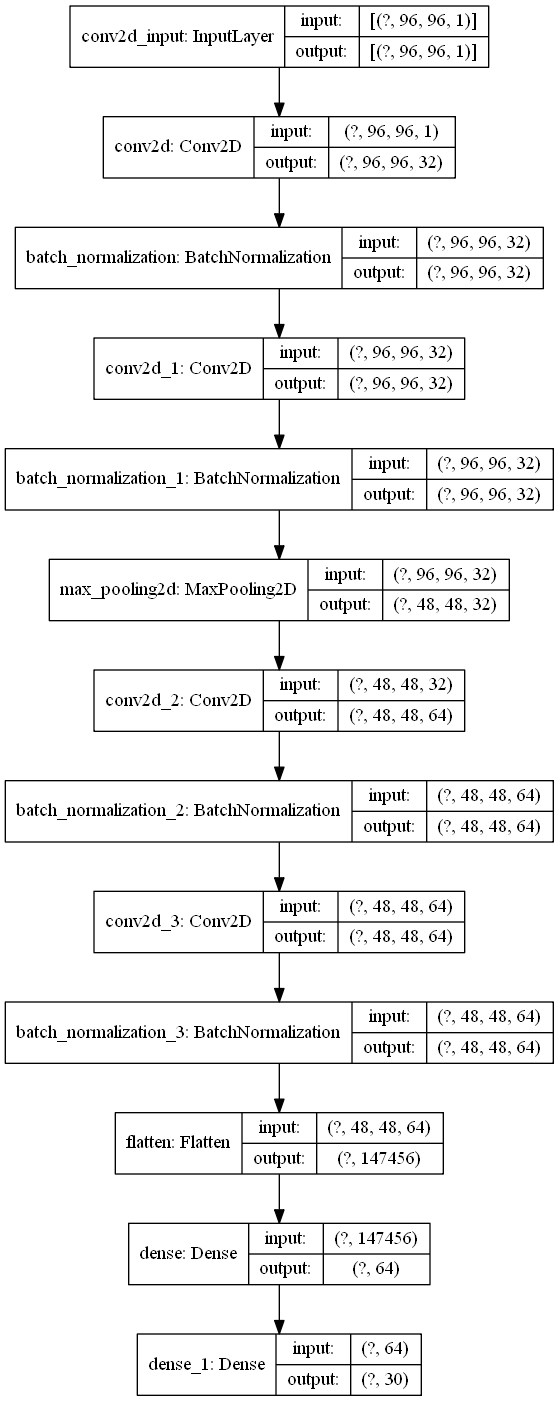

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [16]:
epochs = 100

history = model.fit(train_img, train_targets, 
          batch_size=32, epochs=epochs,
          validation_data=(val_img, val_targets), verbose=0)

In [17]:
def plot_accuracy(hist_dict, epochs):
    train_acc = hist_dict['mae']
    val_acc = hist_dict['val_mae']

    plt.plot(epochs, train_acc, 'bo', label='Train accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
    plt.grid()
    plt.legend(loc='best')

In [18]:
def plot_loss(hist_dict, epochs):
    train_loss = hist_dict['loss']
    val_loss = hist_dict['val_loss']
        
    plt.plot(epochs, train_loss, 'bo', label='Train loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.grid()
    plt.legend(loc='best')

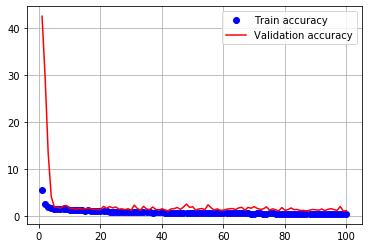

In [19]:
hist_dict = history.history
epochs = np.arange(1, epochs + 1)
plot_accuracy(hist_dict, epochs)

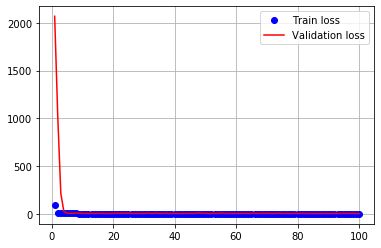

In [20]:
plot_loss(hist_dict, epochs)

In [21]:
model.save("facial_keypoints_detection.h5")

### Step 5: Test & Submit a solution

__Prepare test data__

In [22]:
test_df = pd.read_csv(TEST_DATA_PATH, index_col="ImageId")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 1 to 1783
Data columns (total 1 columns):
Image    1783 non-null object
dtypes: object(1)
memory usage: 27.9+ KB


In [23]:
test_images = test_df.Image
test_images = [list(map(int, img.split())) for img in test_images]
test_images = np.array(test_images, dtype=np.float32) / 255

In [24]:
test_images = test_images.reshape((test_df.shape[0], 96, 96, 1))

__Make predictions__

In [25]:
predictions = model.predict(test_images)

__Prepare submission CSV file__

In [26]:
LOOKUP_TABLE_PATH = os.path.join(DATA_PATH, "IdLookupTable.csv")
lookup_df = pd.read_csv(LOOKUP_TABLE_PATH)

In [27]:
lookup_df.keys()

Index(['RowId', 'ImageId', 'FeatureName', 'Location'], dtype='object')

In [28]:
for index, row in lookup_df.iterrows():
    lookup_df.loc[index, 'Location'] = predictions[row['ImageId'] - 1, output_indices[row['FeatureName']]]

In [29]:
lookup_df.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,65.235374
1,2,1,left_eye_center_y,35.739845
2,3,1,right_eye_center_x,28.933844
3,4,1,right_eye_center_y,36.248962
4,5,1,left_eye_inner_corner_x,60.502647


In [30]:
submission_df = pd.concat([lookup_df.RowId, lookup_df.Location], axis=1)

In [31]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 2 columns):
RowId       27124 non-null int64
Location    27124 non-null float64
dtypes: float64(1), int64(1)
memory usage: 423.9 KB


In [32]:
submission_df.to_csv("facial_keypoints_detection_submission.csv", index=False)

__Plot four randomly chosen results__

In [38]:
how_many = 4
random = np.random.randint(0, test_df.shape[0], how_many)
sample_tests = test_df.Image[random]
sample_tests = [list(map(int, sample.split())) for sample in sample_tests]
sample_tests = np.array(sample_tests).reshape((how_many, 96, 96))

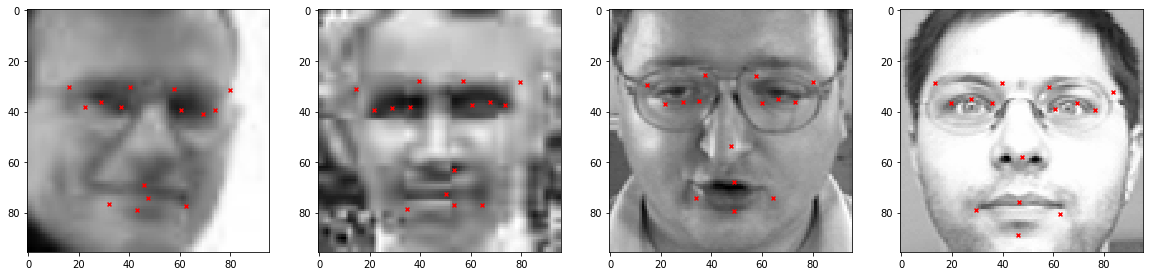

In [39]:
# Plot first how_many results 3 in a row
fig = plt.figure(figsize=(20, 10))
for i in range(how_many):
    ax = fig.add_subplot(np.ceil(how_many / 4), 4, i + 1)
    plt.imshow(sample_tests[i], cmap='gray')
    ax.scatter(predictions[random[i], 0::2], predictions[random[i], 1::2], marker='x', s=15, color='red')